In [1]:
from torch_smodel import *

# 1. Cargamos los datos

In [2]:
df = pd.read_csv('df_integrity.csv')

In [3]:
df

,Theta,Rho
0,0.058802,0.494838
1,3.135673,0.339509
2,0.712411,0.619429
3,0.313996,0.977530
4,4.306543,0.096433
5,3.059836,0.744206
6,5.640147,0.292499
7,4.068061,0.298675
8,5.635786,0.752473
9,4.531024,0.018664


In [4]:
N, K = 21, 15
n = 10**4

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df)

    X += (E==0)*1
    df_res += df2
X = X/n
df_res = df_res/n


<AxesSubplot:>

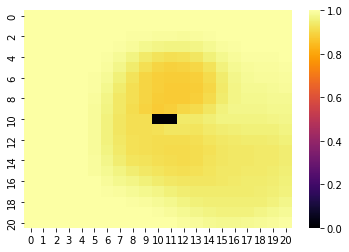

In [5]:
import seaborn as sns

sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

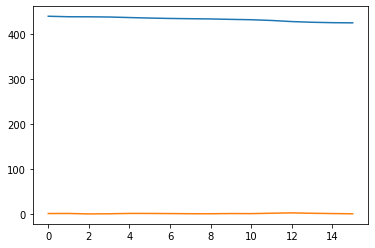

In [6]:
plt.plot(df_res[['Susceptibles', 'Infecteds']])

In [7]:
df_res

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,440.0000,1.0000,0.0000
1,0.058802,1.0,0.494838,1.0,438.8825,1.1175,1.0000
2,3.135673,2.0,0.339509,1.0,438.7560,0.1265,2.1175
3,0.712411,1.0,0.619429,2.0,438.3092,0.4468,2.2440
4,0.313996,1.0,0.97753,3.0,437.0829,1.2263,2.6908
5,4.306543,3.0,0.096433,1.0,435.9540,1.1289,3.9171
6,3.059836,2.0,0.744206,2.0,435.0631,0.8909,5.0460
7,5.640147,4.0,0.292499,1.0,434.5028,0.5603,5.9369
8,4.068061,3.0,0.298675,1.0,433.9857,0.5171,6.4972
9,5.635786,4.0,0.752473,2.0,433.0336,0.9521,7.0143


In [8]:
df_res2 = pd.read_csv('integrity_numpy.csv')

In [9]:
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,0.0,0.0,0.0007,-0.0007,0.0000
2,0.0,0.0,0.0,0.0,0.0022,-0.0015,-0.0007
3,0.0,0.0,0.0,0.0,0.0619,-0.0597,-0.0022
4,0.0,0.0,0.0,0.0,0.2539,-0.1920,-0.0619
5,0.0,0.0,0.0,0.0,0.4448,-0.1909,-0.2539
6,0.0,0.0,0.0,0.0,0.6834,-0.2386,-0.4448
7,0.0,0.0,0.0,0.0,0.8675,-0.1841,-0.6834
8,0.0,0.0,0.0,0.0,0.9679,-0.1004,-0.8675
9,0.0,0.0,0.0,0.0,1.0892,-0.1213,-0.9679
